In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

mouse_drug_data = pd.read_csv(mouse_drug_data_to_load)
clinical_data = pd.read_csv(clinical_trial_data_to_load)
mouse_drug_data.head()



,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [2]:
clinical_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single dataset--merge??
clinical_data_merge = pd.merge(clinical_data, mouse_drug_data, how="left", on=["Mouse ID", "Mouse ID"])
#this is the main table

# Display the data table for preview
clinical_data_merge.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoin
tumor_vol_mean = clinical_data_merge.groupby(["Drug","Timepoint"]).mean()["Tumor Volume (mm3)"]

#tumor_vol_mean.head()

# Convert to DataFrame
tumor_vol_mean = pd.DataFrame(tumor_vol_mean)
# Preview DataFrame
tumor_vol_mean.head().reset_index()
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.mean.html -- does not add last ["tumor vol.."]


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_vol_err = clinical_data_merge.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]
# Convert to DataFrame
tumor_vol_err = pd.DataFrame(tumor_vol_err)
# Preview DataFrame
tumor_vol_err.head().reset_index()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [6]:
# Minor Data Munging to Re-Format the Data Frames
tumor_vol_mean = tumor_vol_mean.reset_index()
tumor_vol_pivot_mean = tumor_vol_mean.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
tumor_vol_pivot_mean.head()

tumor_vol_err = tumor_vol_err.reset_index()
tumor_vol_pivot_err = tumor_vol_err.pivot(index="Timepoint",columns="Drug")["Tumor Volume (mm3)"]
tumor_vol_pivot_err.head()

#spent 1 hour on this...ugh
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html
# after reviewing with tutor--issue was not resetting the index. Why is this?


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


In [7]:
# plt.errorbar(tumor_vol_pivot_mean.index, tumor_vol_pivot_mean["Capomulin"], yerr=tumor_vol_pivot_err["Capomulin"], marker="^", markersize = 6, linestyle="dashed")
# plt.errorbar(tumor_vol_pivot_mean.index, tumor_vol_pivot_mean["Infubinol"], yerr=tumor_vol_pivot_err["Infubinol"],marker="8", markersize = 5, linestyle="dashed")
# plt.errorbar(tumor_vol_pivot_mean.index, tumor_vol_pivot_mean["Ketapril"], yerr=tumor_vol_pivot_err["Ketapril"],marker="*", markersize = 5, linestyle="dashed")
# plt.errorbar(tumor_vol_pivot_mean.index, tumor_vol_pivot_mean["Placebo"], yerr=tumor_vol_pivot_err["Placebo"],marker="D", markersize = 5, linestyle="dashed")
# plt.errorbar(tumor_vol_pivot_mean.index, tumor_vol_pivot_mean["Ceftamin"], yerr=tumor_vol_pivot_err["Ceftamin"],marker="8", markersize = 5, linestyle="dashed")
# plt.errorbar(tumor_vol_pivot_mean.index, tumor_vol_pivot_mean["Naftisol"], yerr=tumor_vol_pivot_err["Naftisol"],marker="8", markersize = 5, linestyle="dashed")
# plt.errorbar(tumor_vol_pivot_mean.index, tumor_vol_pivot_mean["Propriva"], yerr=tumor_vol_pivot_err["Propriva"],marker="8", markersize = 5, linestyle="dashed")
# plt.errorbar(tumor_vol_pivot_mean.index, tumor_vol_pivot_mean["Ramicane"], yerr=tumor_vol_pivot_err["Ramicane"],marker="8", markersize = 5, linestyle="dashed")
# plt.errorbar(tumor_vol_pivot_mean.index, tumor_vol_pivot_mean["Stelasyn"], yerr=tumor_vol_pivot_err["Stelasyn"],marker="8", markersize = 5, linestyle="dashed")
# plt.errorbar(tumor_vol_pivot_mean.index, tumor_vol_pivot_mean["Zoniferol"], yerr=tumor_vol_pivot_err["Zoniferol"],marker="8", markersize = 5, linestyle="dashed")


# plt.title("Tumor Study")
# plt.xlabel("Timepoint")
# plt.ylabel("tumer growth")
# plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo',"Ceftamin","Naftisol","Propriva","Ramicane"],loc="best", fontsize="small")

# # Save the Figure
# plt.savefig("errorchartTumorStudy.png")
# # Show the Figure
# plt.show()

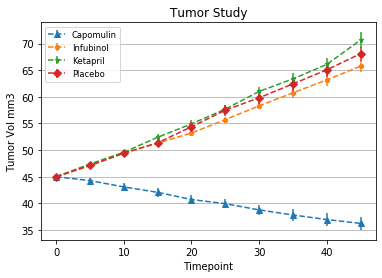

In [8]:
# Generate the Plot (with Error Bars)
plt.errorbar(tumor_vol_pivot_mean.index, tumor_vol_pivot_mean["Capomulin"], yerr=tumor_vol_pivot_err["Capomulin"], marker="^", markersize = 6, linestyle="dashed")
plt.errorbar(tumor_vol_pivot_mean.index, tumor_vol_pivot_mean["Infubinol"], yerr=tumor_vol_pivot_err["Infubinol"],marker="8", markersize = 5, linestyle="dashed")
plt.errorbar(tumor_vol_pivot_mean.index, tumor_vol_pivot_mean["Ketapril"], yerr=tumor_vol_pivot_err["Ketapril"],marker="*", markersize = 5, linestyle="dashed")
plt.errorbar(tumor_vol_pivot_mean.index, tumor_vol_pivot_mean["Placebo"], yerr=tumor_vol_pivot_err["Placebo"],marker="D", markersize = 5, linestyle="dashed")

plt.title("Tumor Study")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Vol mm3")
plt.grid(axis="y")
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'],loc="best", fontsize="small")

# Save the Figure
plt.savefig("errorchartTumorStudy.png")
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
met_mean_sites = clinical_data_merge.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]
# Convert to DataFrame
met_mean_sites = pd.DataFrame(met_mean_sites)
# Preview DataFrame
met_mean_sites.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [10]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_err_sites = clinical_data_merge.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]
# Convert to DataFrame
met_err_sites = pd.DataFrame(met_err_sites)
# Preview DataFrame
met_err_sites.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [11]:
# Minor Data Munging to Re-Format the Data Frames
met_mean_sites = met_mean_sites.reset_index()
met_mean_sites_pivot = met_mean_sites.pivot(index="Timepoint",columns="Drug")["Metastatic Sites"]

# Preview that Reformatting worked
met_mean_sites_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [12]:
# Minor Data Munging to Re-Format the Data Frames
met_err_sites = met_err_sites.reset_index()
met_err_sites_pivot = met_err_sites.pivot(index="Timepoint",columns="Drug")["Metastatic Sites"]

# Preview that Reformatting worked
met_err_sites_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


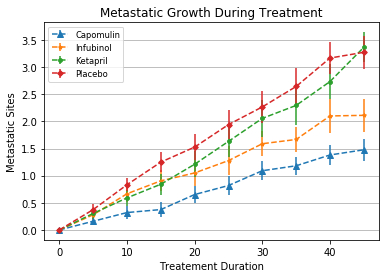

In [13]:
# Generate the Plot (with Error Bars)
plt.errorbar(met_mean_sites_pivot.index, met_mean_sites_pivot["Capomulin"],yerr=met_err_sites_pivot["Capomulin"],marker="^", markersize = 6, linestyle="dashed")
plt.errorbar(met_mean_sites_pivot.index, met_mean_sites_pivot["Infubinol"],yerr=met_err_sites_pivot["Infubinol"],marker="*", markersize = 4, linestyle="dashed")
plt.errorbar(met_mean_sites_pivot.index, met_mean_sites_pivot["Ketapril"],yerr=met_err_sites_pivot["Ketapril"],marker="8", markersize = 4, linestyle="dashed")
plt.errorbar(met_mean_sites_pivot.index, met_mean_sites_pivot["Placebo"],yerr=met_err_sites_pivot["Placebo"],marker="D", markersize = 4, linestyle="dashed")
# plt.errorbar(met_mean_sites_pivot.index, met_mean_sites_pivot["Ceftamin"],yerr=met_err_sites_pivot["Ceftamin"],marker="^", markersize = 6, linestyle="dashed")
# plt.errorbar(met_mean_sites_pivot.index, met_mean_sites_pivot["Naftisol"],yerr=met_err_sites_pivot["Naftisol"],marker="*", markersize = 4, linestyle="dashed")
# plt.errorbar(met_mean_sites_pivot.index, met_mean_sites_pivot["Propriva"],yerr=met_err_sites_pivot["Propriva"],marker="8", markersize = 4, linestyle="dashed")
# plt.errorbar(met_mean_sites_pivot.index, met_mean_sites_pivot["Ramicane"],yerr=met_err_sites_pivot["Ramicane"],marker="D", markersize = 10, linestyle="dashed")
# plt.errorbar(met_mean_sites_pivot.index, met_mean_sites_pivot["Stelasyn"],yerr=met_err_sites_pivot["Stelasyn"],marker="8", markersize = 4, linestyle="dashed")
# plt.errorbar(met_mean_sites_pivot.index, met_mean_sites_pivot["Zoniferol"],yerr=met_err_sites_pivot["Zoniferol"],marker="D", markersize = 4, linestyle="dashed")

# plt.errorbar(tumor_vol_pivot_mean.index, tumor_vol_pivot_mean["Capomulin"], yerr=tumor_vol_pivot_err["Capomulin"], marker="o", markersize = 4, linestyle="dashed")
# plt.errorbar(tumor_vol_pivot_mean.index, tumor_vol_pivot_mean["Infubinol"], yerr=tumor_vol_pivot_err["Infubinol"],marker="s", markersize = 4, linestyle="dashed")
# plt.errorbar(tumor_vol_pivot_mean.index, tumor_vol_pivot_mean["Ketapril"], yerr=tumor_vol_pivot_err["Ketapril"],marker=",", markersize = 4, linestyle="dashed")
# plt.errorbar(tumor_vol_pivot_mean.index, tumor_vol_pivot_mean["Placebo"], yerr=tumor_vol_pivot_err["Placebo"],marker="o", markersize = 4, linestyle="dashed")


plt.title("Metastatic Growth During Treatment")
plt.ylabel("Metastatic Sites")
plt.xlabel("Treatement Duration")
plt.grid (axis='y')
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo'],loc="best", fontsize="small")

# Save the Figure
plt.savefig("errorchartmetastatic.png")
# Show the Figure
plt.show()

## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = clinical_data_merge.groupby(["Drug", "Timepoint"]).count()["Mouse ID"]
# Convert to DataFrame
mice_count = pd.DataFrame(mice_count)
mice_count.rename(columns = {"Mouse ID":"Mouse Count"}, inplace = True)
# Preview DataFrame
mice_count.head().reset_index()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [15]:
# Minor Data Munging to Re-Format the Data Frames
# why do I have to reset the index here even though I did it in the previous cell

mice_count = mice_count.reset_index()
mice_count_pivot = mice_count.pivot(index="Timepoint",columns="Drug")["Mouse Count"]
mice_count_pivot


# Preview the Data Frame


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


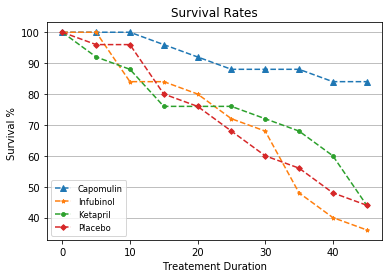

In [16]:
# Generate the Plot (Accounting for percentages)
plt.plot(100 * mice_count_pivot["Capomulin"]/25, marker="^", markersize = 6, linestyle="dashed")
plt.plot(100 * mice_count_pivot["Infubinol"]/25, marker="*", markersize = 4, linestyle="dashed")
plt.plot(100 * mice_count_pivot["Ketapril"]/25, marker="8", markersize = 4, linestyle="dashed")
plt.plot(100 * mice_count_pivot["Placebo"]/25, marker="D",markersize = 4, linestyle="dashed")
# plt.plot(100 * mice_count_pivot["Ceftamin"]/25, marker="^", markersize = 6, linestyle="dashed")
# plt.plot(100 * mice_count_pivot["Naftisol"]/25, marker="*", markersize = 4, linestyle="dashed")
# plt.plot(100 * mice_count_pivot["Propriva"]/25, marker="8", markersize = 4, linestyle="dashed")
# plt.plot(100 * mice_count_pivot["Ramicane"]/25, marker="D",markersize = 4, linestyle="dashed")

# plt.errorbar(tumor_vol_pivot_mean.index, tumor_vol_pivot_mean["Capomulin"], yerr=tumor_vol_pivot_err["Capomulin"], marker="o", markersize = 4, linestyle="dashed")
# plt.errorbar(tumor_vol_pivot_mean.index, tumor_vol_pivot_mean["Infubinol"], yerr=tumor_vol_pivot_err["Infubinol"],marker="s", markersize = 4, linestyle="dashed")
# plt.errorbar(tumor_vol_pivot_mean.index, tumor_vol_pivot_mean["Ketapril"], yerr=tumor_vol_pivot_err["Ketapril"],marker=",", markersize = 4, linestyle="dashed")
# plt.errorbar(tumor_vol_pivot_mean.index, tumor_vol_pivot_mean["Placebo"], yerr=tumor_vol_pivot_err["Placebo"],marker="o", markersize = 4, linestyle="dashed")
plt.title("Survival Rates")
plt.ylabel("Survival % ")
plt.xlabel("Treatement Duration")
plt.grid (axis='y')
plt.legend(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo','Ceftamin','Naftisol','Propriva','Ramicane'],loc="best", fontsize="small")
# Save the Figure
plt.savefig("percentages.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [17]:
# Calculate the percent changes for each drug
pct_change_tum = (tumor_vol_pivot_mean.iloc[-1]-tumor_vol_pivot_mean.iloc[0])/(tumor_vol_pivot_mean.iloc[0])*100
pct_change_tum_err = (tumor_vol_pivot_err.iloc[-1]-tumor_vol_pivot_err.iloc[0])/(tumor_vol_pivot_err.iloc[0])*100

# Display the data to confirm
pct_change_tum

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

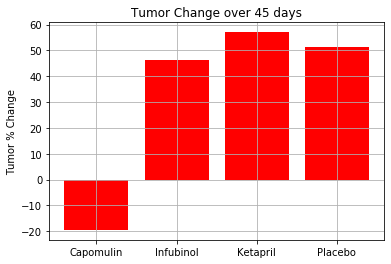

In [18]:
# Store all Relevant Percent Changes into a Tuple
pct_change = (pct_change_tum["Capomulin"],
             pct_change_tum["Infubinol"],
             pct_change_tum["Ketapril"],
             pct_change_tum["Placebo"])

# Splice the data between passing and failing drugs


x_axis = np.arange(len(pct_change))
plt.bar(x_axis, pct_change, color='r', align="center")

# Orient widths. Add labels, tick marks, etc. 
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations,["Capomulin","Infubinol","Ketapril","Placebo"])
plt.grid (axis='y')
plt.grid (axis='x')
plt.title ("Tumor Change over 45 days")
plt.ylabel("Tumor % Change")
#plt.xlabel("Drugs")

# Use functions to label the percentages of changes

########not a clue

# Call functions to implement the function calls


# Save the Figure
plt.savefig("last bar chart.png")

# Show the Figure.FAIL
plt.show()

![Metastatic Spread During Treatment](../Images/change.png)